In [2]:
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp

sys.path.append("/home/sergey/tools/mmbench/")
import mmbench as mb

sys.path.append("/home/sergey/tools/sclitr/")
import sclitr as sl

# Figures aesthetics
sc.set_figure_params(dpi=150)

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())
sns.set_style("ticks")

In [15]:
adata_nc = sc.read_h5ad("NC_work_in_progress/adata_control.h5ad")

adata_n = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/merged_clones_trunk_E13/trunk_neur_E13_clonal_clusters.h5ad")
adata_n = adata_n[~adata_n.obs["celltype_l2"].isin(["Melanocytes", "Sensory", "CNS"])]

adata_m = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/merged_clones_trunk_E13/trunk_mes_E13_clonal_clusters.h5ad")

clones = sc.read_h5ad("/home/sergey/data/clonal_project/anndatas/merged_clones_trunk_E13/E13_clonal_embedding.h5ad")

In [35]:
composition = {"CNS": {}, "NC": {}, "Mes": {}}

for stage in ["E7.5", "E8.5"]:
    clones = np.array(list(set(
        adata_m.obs[f"{stage}:clones"]
    ).union(
        adata_n.obs[f"{stage}:clones"]
    ).union(
        adata_nc.obs[f"{stage}:clones"]
    )))
    clones = clones[clones != "NA"]

    for clone in clones:
        composition["Mes"][f"{stage}:{clone}"] = sum(adata_m.obs[f"{stage}:clones"] == clone)
        composition["NC"][f"{stage}:{clone}"] = sum(adata_nc.obs[f"{stage}:clones"] == clone)
        composition["CNS"][f"{stage}:{clone}"] = sum(adata_n.obs[f"{stage}:clones"] == clone)
        
composition = pd.DataFrame(composition)

(-2.0, 102.0)

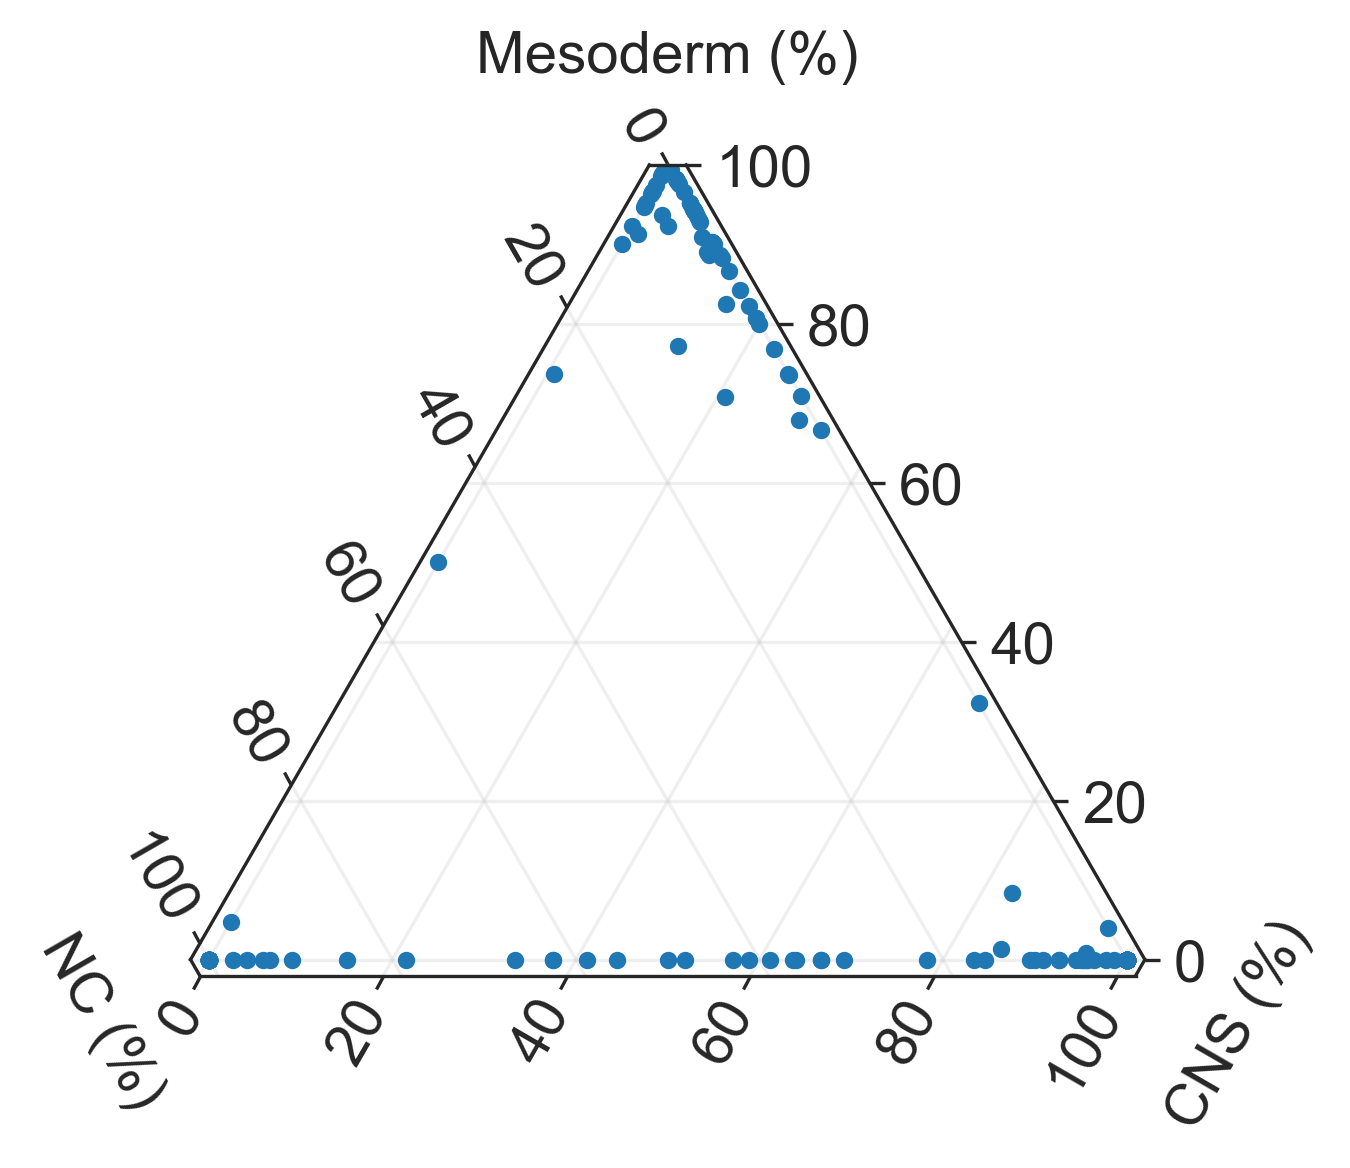

In [122]:
min_size = 10
composition_plot = composition[composition.sum(axis=1) > min_size]

ax = plt.subplot(projection="ternary", ternary_sum=100)

ax.set_tlabel("Mesoderm (%)")
ax.set_llabel("NC (%)")
ax.set_rlabel("CNS (%)")

# Order = top, left, right
ax.scatter(
    composition_plot.Mes,
    composition_plot.NC,
    composition_plot.CNS,
    s=10,
)

ax.grid(alpha=0.3)

ax.set_tlim(-2, 102)
ax.set_llim(-2, 102)
ax.set_rlim(-2, 102)

(-2.0, 42.0)

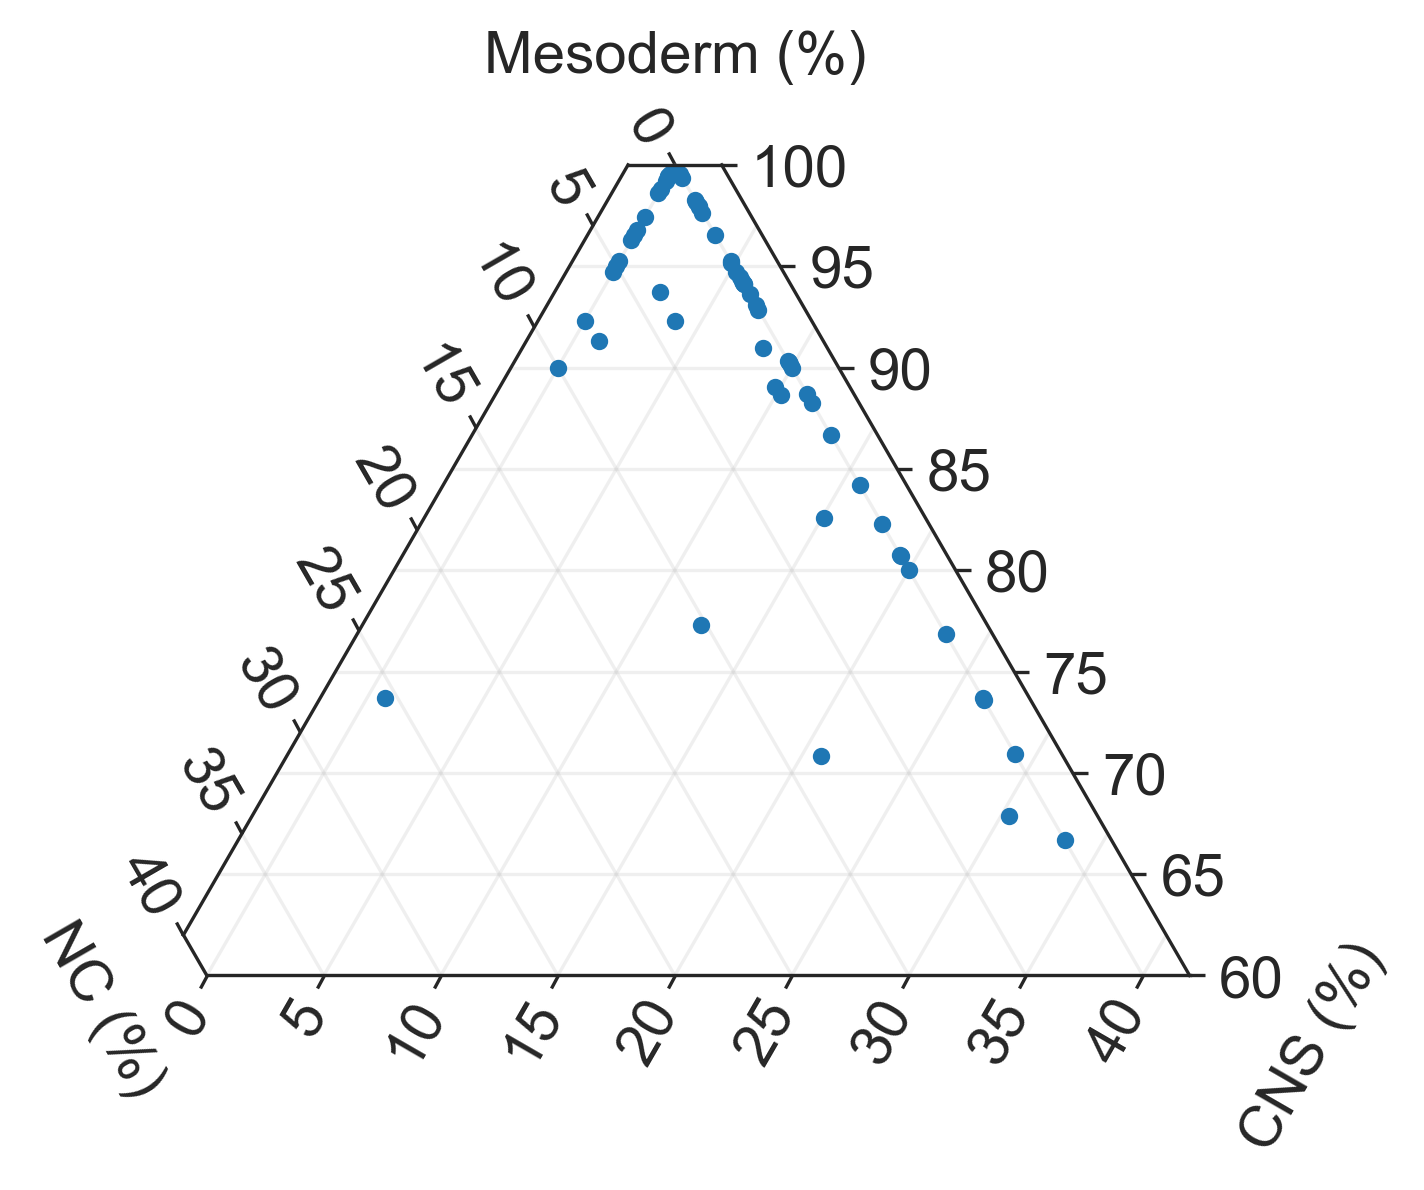

In [123]:
ax = plt.subplot(projection="ternary", ternary_sum=100)

ax.set_tlabel("Mesoderm (%)")
ax.set_llabel("NC (%)")
ax.set_rlabel("CNS (%)")

# Order = top, left, right
ax.scatter(
    composition_plot.Mes,
    composition_plot.NC,
    composition_plot.CNS,
    s=10,
)

ax.grid(alpha=0.3)

ax.set_tlim(60, 102)
ax.set_llim(-2, 102)
ax.set_rlim(-2, 102)